# Week 2 Section 1 - Introduction to optimization and the efficient frontier

### Check that ALL erk is removed from the edhec risk kit. Can do so by CTRL+F for erk inside

## Video: The only free lunch in finance

### 2-asset combinations

$$ \sigma^2 (w_{a},w_{b})=
\sigma_{A}^2w_{A}^2+
\sigma_{B}^2w_{B}^2+
2w_A w_B \sigma_A \sigma_B \rho_{AB}
$$

- $w_a$: weight of asset A
- $\sigma_a$: volatility of asset A
- $\rho_{A,B}$= correlation coefficient of $A$ and $B$

### Efficient Frontier

In [1]:
import pandas as pd
ind = pd.read_csv("data/ind30_m_vw_rets.csv", header=0, index_col=0, parse_dates=True)/100

ind.head()

C:\Users\acer\AppData\Local\Temp\ipykernel_60820\1100305315.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ind = pd.read_csv("data/ind30_m_vw_rets.csv", header=0, index_col=0, parse_dates=True)/100


,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
192607,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
192608,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
192609,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
192610,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
192611,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [2]:
#check that dates is parsed correctly or not:
ind.index

Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702, 192703,
       192704,
       ...
       201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810, 201811,
       201812],
      dtype='int64', length=1110)

In [3]:
#change to month format:
ind.index = pd.to_datetime(ind.index, format="%Y%m").to_period("M")

ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [4]:
# Columns have embedded space to get rid of: Rewrite the column names to strip all the spaces:
ind.columns = ind.columns.str.strip()
ind.columns


Index(['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other'],
      dtype='object')

In [5]:
# Setup the ind variable based on the erk functions:

%load_ext autoreload
%autoreload 2
%matplotlib inline

import edhec_risk_kit as erk
ind = erk.get_ind_returns()

ind.shape

(1110, 30)

In [6]:
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


<Axes: >

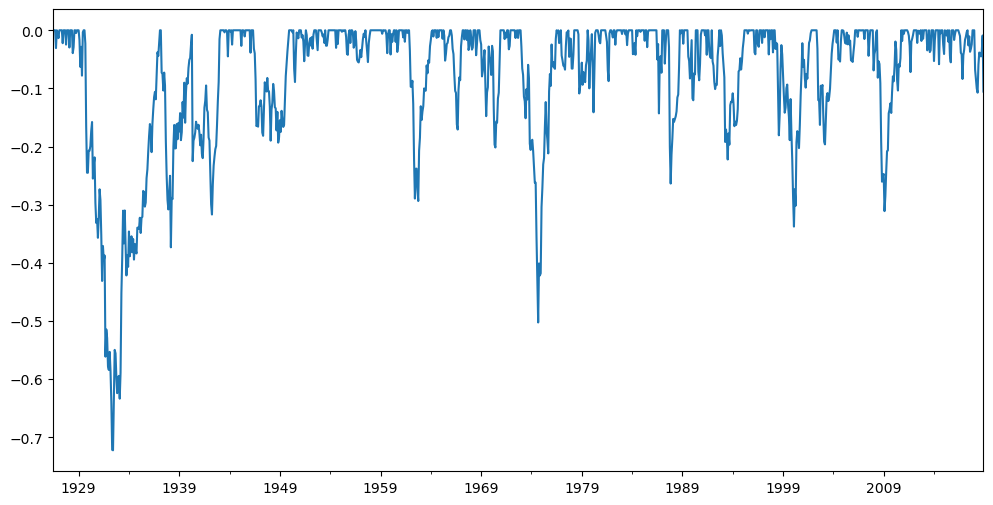

In [7]:
#Analyse the drawdowns of the food column, and plot a line graph:
erk.drawdown(ind['Food'])["Drawdown"].plot.line(figsize=(12,6))

In [8]:
#Indexing into a list and thats why double square brackets: Use cornish fisher
## Looking at Value at Risk:
cols_of_interest = ["Food", "Smoke", "Beer", "Coal", "Fin"]
erk.var_gaussian(ind[cols_of_interest], modified=True)

Food     0.061207
Smoke    0.080292
Beer     0.033881
Coal     0.047359
Fin      0.075199
dtype: float64

In [9]:
#Look at all the columns instead, looking at the tail with most risk:
erk.var_gaussian(ind, modified=True).sort_values().tail()

Carry    0.094527
Meals    0.098403
BusEq    0.099377
Games    0.100701
Mines    0.102782
dtype: float64

In [10]:
#Look at all the columns instead, looking at the head with least risk:
erk.var_gaussian(ind, modified=True).sort_values().head()

Beer     0.033881
Coal     0.047359
Food     0.061207
Telcm    0.064719
Hshld    0.064886
dtype: float64

<Axes: >

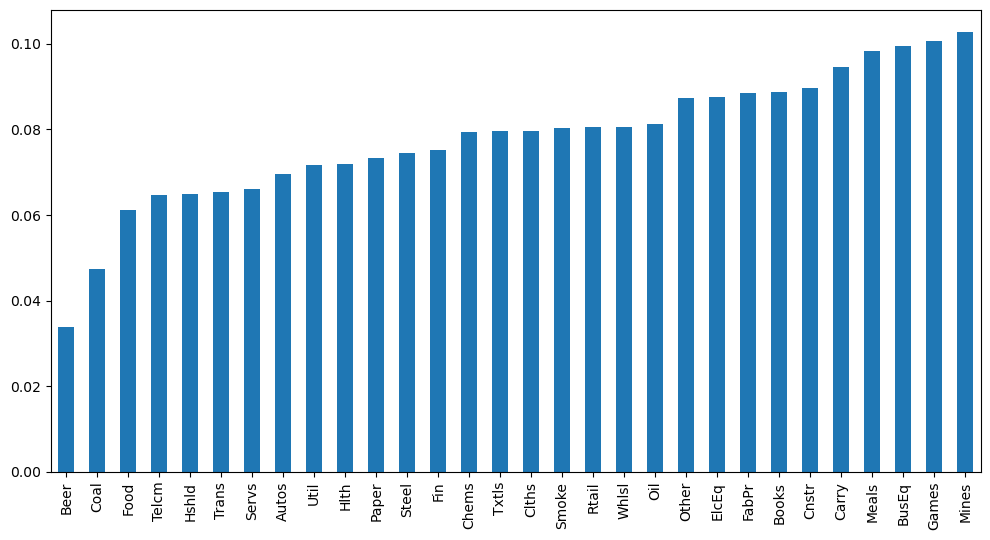

In [11]:
#Plot VaR as a bar chart, usin Cornish-Fisher method:
erk.var_gaussian(ind, modified=True).sort_values().plot.bar(figsize=(12,6))

<Axes: title={'center': 'Industry Sharpe Ratios 1926-2018'}>

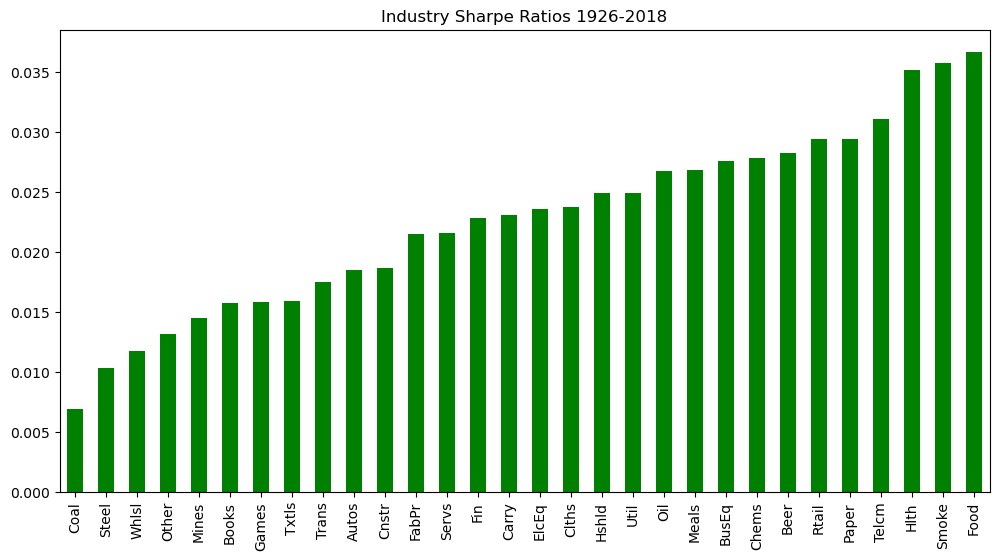

In [12]:
#Calculate Sharpe ratios of the industries portfolios: Assume riskfree rate is 3%, and 12 monthly data
erk.sharpe(ind, 0.03, 12).sort_values().plot.bar(title="Industry Sharpe Ratios 1926-2018", figsize=(12,6), color = "green")


<Axes: title={'center': 'Industry Sharpe Ratios 2000-2018'}>

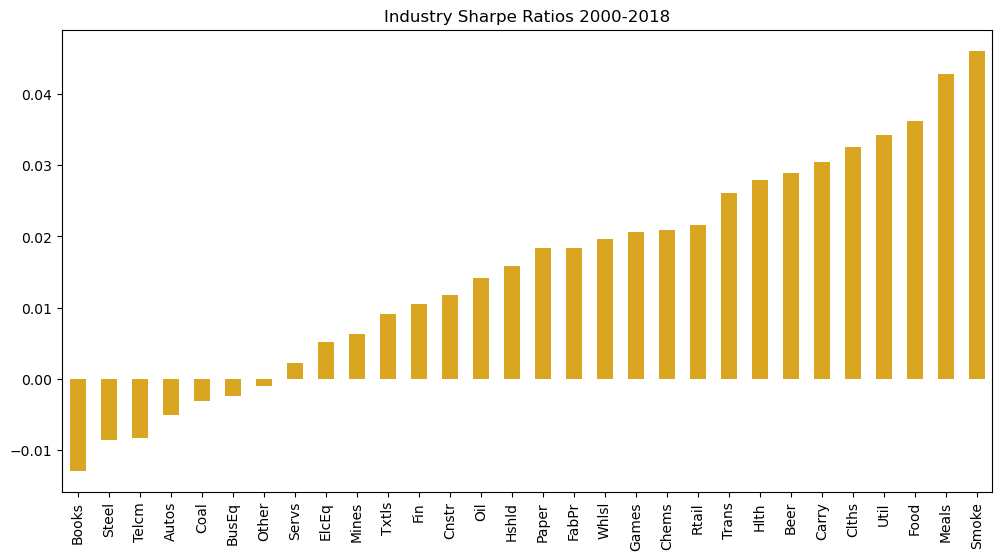

In [13]:
#However if you want to look at Year 2000 onwards, slice from year 2000:
erk.sharpe(ind["2000":], 0.03, 12).sort_values().plot.bar(title="Industry Sharpe Ratios 2000-2018", figsize=(12,6), color = "goldenrod")

In [14]:
#Get annualized returns of portfolios from 1995 to 2000:
er  = erk.annualize_rets(ind["1996":"2000"], 12)

<Axes: >

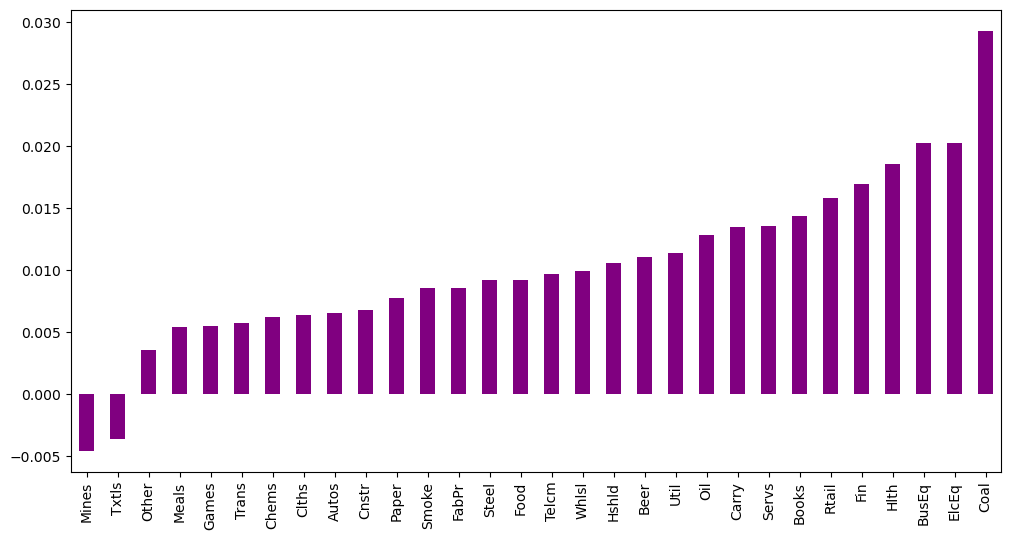

In [15]:
#Plot bar graph of annualized returns:
er.sort_values().plot.bar(color = "purple", figsize=(12,6))

In [16]:
#Generate a Covariance Matrix:
cov = ind["1996":"2000"].cov()
cov.shape

(30, 30)

In [17]:
cov
#recap that the variance between 2 same series, e.g. food and food, is just the variance of itself

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Food,0.002609,0.002379,0.002061,0.000846,0.001035,0.001374,0.001733,0.001230,0.001414,0.001216,...,0.000667,0.000237,-0.000315,0.001429,0.001534,0.000740,0.001363,0.001230,0.002132,0.001057
Beer,0.002379,0.005264,0.001359,0.001348,0.000865,0.002804,0.001704,0.001955,0.001460,0.002005,...,0.001146,0.000438,0.000007,0.001710,0.002284,0.000697,0.001690,0.001822,0.002571,0.001383
Smoke,0.002061,0.001359,0.008349,0.000379,-0.000128,0.001167,0.000950,0.001038,0.000853,0.000779,...,0.000062,-0.000218,-0.000120,0.001327,0.000396,0.001707,0.000105,0.000703,0.001312,0.001741
Games,0.000846,0.001348,0.000379,0.003773,0.001726,0.001206,0.002189,0.001433,0.001775,0.001422,...,0.001922,0.002848,0.003434,0.001852,0.001578,0.001966,0.001872,0.001561,0.002416,0.002382
Books,0.001035,0.000865,-0.000128,0.001726,0.002612,0.001025,0.002361,0.000758,0.001731,0.001459,...,0.001918,0.002367,0.001944,0.001638,0.001776,0.001392,0.002223,0.001189,0.002261,0.001442
Hshld,0.001374,0.002804,0.001167,0.001206,0.001025,0.003300,0.001320,0.001473,0.001413,0.001364,...,0.001060,0.001310,0.001102,0.001873,0.001582,0.000683,0.001378,0.001202,0.001912,0.001580
Clths,0.001733,0.001704,0.000950,0.002189,0.002361,0.001320,0.005655,0.000834,0.002932,0.002472,...,0.001436,0.001625,0.000834,0.003165,0.002862,0.001934,0.003013,0.002721,0.003210,0.002299
Hlth,0.001230,0.001955,0.001038,0.001433,0.000758,0.001473,0.000834,0.002565,0.000474,0.000608,...,0.001204,0.001651,0.001535,0.000650,0.000944,0.001056,0.000869,0.000986,0.001617,0.001258
Chems,0.001414,0.001460,0.000853,0.001775,0.001731,0.001413,0.002932,0.000474,0.003276,0.001868,...,0.001004,0.001203,0.001031,0.002920,0.002196,0.001404,0.001808,0.001646,0.002469,0.002059
Txtls,0.001216,0.002005,0.000779,0.001422,0.001459,0.001364,0.002472,0.000608,0.001868,0.003117,...,0.000907,0.000666,0.000702,0.002058,0.001929,0.001610,0.001805,0.001250,0.001986,0.001811


## Video: Markowitz optimization and the efficient frontier
### The efficient frontier
The *efficient frontier* represents: The portfolios that offer the lowest volatility for a given level of return. They also represent the portfolio of highest expected return for a given level of volatility.

---
## Video: Applying quadprog to draw the efficient frontier

---
The efficient frontier is simply the space of
portfolios that we would want to hold
because there is no way
of getting a higher return for the same level of
volatility or for you to get
a portfolio with equivalent return, but lower volatility.


### Convex optimization to draw the efficient frontier
The return of the portfolio $R_p$ is the weighted $w_i$ sum of the returns $R_i$ of the assets in the portfolio.
$$R_p= \sum_{i=1}^{k}w_iR_i$$
The expression for the *portfolio variance* $\sigma^2$ is a generalization of the formula we've already seen in the 2-asset case:
$$\sigma_{p}^2=\sum_{i=1}^k \sum_{j=1}^k w_i w_j \sigma_i \sigma_j \rho_{ij}$$
$$\mathit{Covariance}(i,j)=\sigma_{ij}=\sigma_i \sigma_j \rho_{ij}$$
$$\sigma_{p}^2=\sum_{i=1}^k \sum_{j=1}^k w_i w_j \sigma_{ij}$$

### Matrix form expression for the portfolio return

$$R_p = w^T R$$

- $w$ is the $k*1$ vector of weights
- $R$ is the $k*1$ vector of asset returns

### The covariance matrix
The *covariance matrix* $\Sigma$ (not to be confused with sum $\sum_{lo}^{hi}$) is a symmetric square $k*k$ matrix where the $i$ and $j$ element is $\sigma_ij$, the covariance between $i$ and $j$, which is $\sigma_i \sigma_j \rho_{ij}$. Each diagonal element of $\Sigma$ is $\sigma_{ii}= \sigma_i \sigma_i \rho_{ii}$.
&nbsp;

$$\sigma_{p}^2 = w^T \Sigma w$$

### Plotting the efficient frontier
A portfolio is on the efficient frontier if it is the one that has the minimum volatility $R_p=w^T\Sigma w$ for a certain level of return. Minimize $\frac{1}{2}w^T\Sigma w$ in a *quadratic optimizer* with the following constraints:

- the portfolio return must be at the desired level
- all asset weights have to be $\geq 0$
- the asset weights add up to one

In [18]:
#Function equation for portfolio return
def portfolio_return(weights, returns):
    """
    Weights -> Returns
    """
    return weights.T @ returns #direct translation of above equation where @ is matrix multiplication and T is transpose

In [19]:
#Function equation for portfolio risk:
def portfolio_vol(weights, covmat):
    """
    Weights -> Vol
    """
    return (weights.T @ covmat @ weights)**0.5

In [20]:
#Sample Illustration of returns and volatility in l:
l = ["Food", "Beer", "Smoke", "Coal"]

#We extract out the column items within l:
er[l]

Food     0.009248
Beer     0.011062
Smoke    0.008570
Coal     0.029331
dtype: float64

In [21]:
#Obtain covariance matrix of l:
cov.loc[l,l]

,Food,Beer,Smoke,Coal
Food,0.002609,0.002379,0.002061,0.000027
Beer,0.002379,0.005264,0.001359,0.001728
Smoke,0.002061,0.001359,0.008349,-0.000733
Coal,0.000027,0.001728,-0.000733,0.018641


In [22]:
import numpy as np
#Experimenting with equally weighted portfolio of l:
weights = np.repeat(1/4, 4)

#Obtain returns and risk values for this portfolio
erk.portfolio_return(weights, er[l])

0.014552811786842201

In [23]:
erk.portfolio_vol(weights, cov.loc[l,l])

0.055059195776437045

## 2 Asset Case of Efficient Frontier Plotting

In [24]:
l = ["Games", "Fin"]

n_points = 20
weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)] #Generate n_points equally spaced points between 0 and 1, linked to each value of w produced by linspace

weights

[array([0., 1.]),
 array([0.05263158, 0.94736842]),
 array([0.10526316, 0.89473684]),
 array([0.15789474, 0.84210526]),
 array([0.21052632, 0.78947368]),
 array([0.26315789, 0.73684211]),
 array([0.31578947, 0.68421053]),
 array([0.36842105, 0.63157895]),
 array([0.42105263, 0.57894737]),
 array([0.47368421, 0.52631579]),
 array([0.52631579, 0.47368421]),
 array([0.57894737, 0.42105263]),
 array([0.63157895, 0.36842105]),
 array([0.68421053, 0.31578947]),
 array([0.73684211, 0.26315789]),
 array([0.78947368, 0.21052632]),
 array([0.84210526, 0.15789474]),
 array([0.89473684, 0.10526316]),
 array([0.94736842, 0.05263158]),
 array([1., 0.])]

<Axes: xlabel='Volatility', ylabel='Returns'>

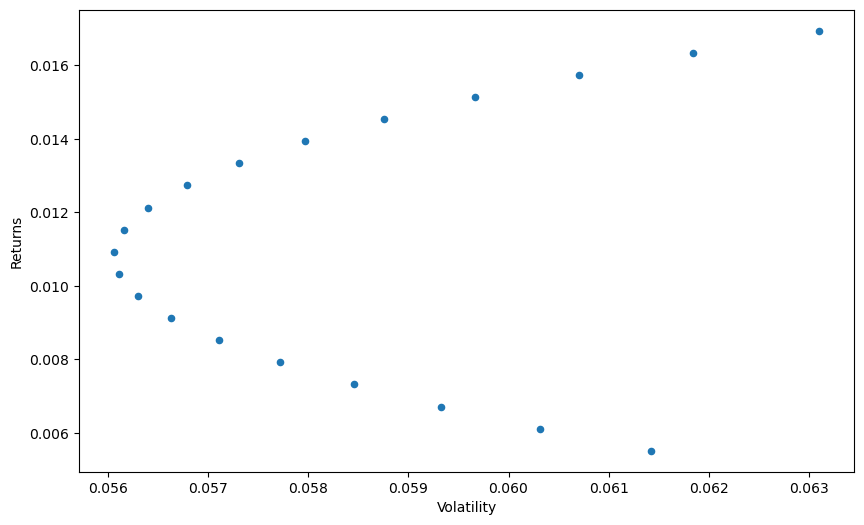

In [25]:
#Get returns, risks, and efficient frontier values
## Then plot it on a graph:

rets = [erk.portfolio_return(w, er[l]) for w in weights]
vols = [erk.portfolio_vol(w, cov.loc[l,l]) for w in weights]

import pandas as pd
ef = pd.DataFrame({'Returns': rets, 'Volatility': vols})
ef.plot.scatter(x='Volatility', y='Returns', figsize=(10,6))

<Axes: xlabel='Volatility'>

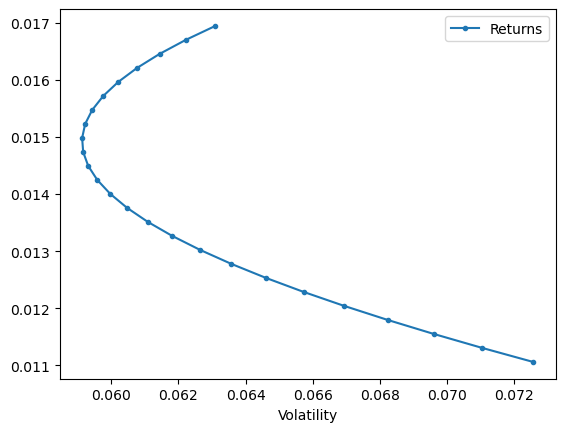

In [26]:
#Use defined function to try for "Fin" and "Beer" instead:

l = ["Fin", "Beer"]

erk.plot_ef2(25, er[l], cov.loc[l,l])


## N-Asset Efficient Frontier

How to change from 2 asset to N-asset? \
def plot_ef2(n_points, er, cov): \
    """ \
    Plots the 2-asset efficient frontier \
    """
    <b>weights = minimize_vol(target_returns) ??? this is the input into the quadratic optimizer </b>\
    rets = [portfolio_return(w, er) for w in weights] \
    vols = [portfolio_vol(w, cov) for w in weights] \
    ef = pd.DataFrame({ \
        "Returns": rets, \
        "Volatility": vols \
    }) \
    return ef.plot(x="Volatility", y="Returns", style=".-") \


    Lambda means an anonymous function

In [27]:
from scipy.optimize import minimize

In [28]:
def minimize_vol(target_return, er, cov):
    """
    target_ret -> w
    """
    n = er.shape[0]
    init_guess = np.repeat(1/n, n) #Equally weighted portfolio
    bounds = ((0.0, 1.0),) * n # Creates a tuple weight to be repeated for every asset. Multiplying a tuple or list just makes n copies of it.
    #Putting in all the constraints:
    return_is_target = {
        'type': 'eq',
        'args': (er,),
        'fun': lambda weights, er: target_return - erk.portfolio_return(weights, er)
    }
    weights_sum_to_1 = {
        'type': 'eq',
        'fun': lambda weights: np.sum(weights) -1
    }
    results = minimize(erk.portfolio_vol, init_guess, args=(cov,), 
                       method='SLSQP', options={'disp': False},
                       constraints=(return_is_target, weights_sum_to_1),
                       bounds=bounds
                       )
    
    return results.x

In [29]:
#Test above code with "Fin" and "Beer" 2 assets before putting into the erk:

l = ["Games", "Fin"]

In [30]:
w15 = minimize_vol(0.15, er[l], cov.loc[l,l]) #Find target return of 15%
vol15 = erk.portfolio_vol(w15, cov.loc[l,l])

vol15 #Obtain the risk at return of 15%

0.05633261578538832

In [31]:
#Obtain the weights for target return of 15%:
w15

array([0.43348169, 0.56651831])

In [32]:
#Plotting the multi-asset efficient frontier:

def optimal_weights(n_points, er, cov):
    """
    Generates a list of weights which represent a 'n_points' number of equally
    spaced weights in a frontier of returns, to run the optimizer on to minimize the volatility
    """
    target_rs = np.linspace(er.min(), er.max(), n_points)
    weights = [minimize_vol(target_return, er, cov) for target_return in target_rs]
    return weights

def plot_ef(n_points, er, cov):
    """
    Plots the N-asset efficient frontier
    """
    weights = optimal_weights(n_points, er, cov)
    rets = [erk.portfolio_return(w, er) for w in weights]
    vols = [erk.portfolio_vol(w, cov) for w in weights]
    ef = pd.DataFrame({
        "Returns": rets, 
        "Volatility": vols
    })
    return ef.plot(x="Volatility", y="Returns", style=".-")

In [33]:
cov.index


Index(['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other'],
      dtype='object')

<Axes: xlabel='Volatility'>

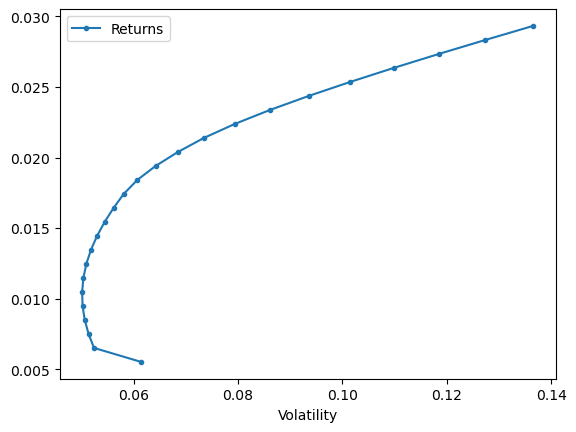

In [34]:
#Testing for 4 asset portfolio:

l = ["Smoke", "Fin", "Games", "Coal"]
plot_ef(25, er[l], cov.loc[l,l])

# Week 2 Section 2 - Implementing Markowitz
## Video: Fund separation theorem and the capital market line

## Finding the Maximum Sharpe Ratio Portfolio

The *maximum Sharpe ratio portfolio* (MSR) is at the point where the orange line that starts at the *risk-free rate* (here generously set at 12%) touches the efficient frontier. The slope of the orange line is the Sharpe ratio of the portfolio.

The MSR portfolio contains no exposure to [specific risk](https://www.investopedia.com/terms/s/specificrisk.asp). This type of risk is unrewarded because it can be diversified away.

The *tangency portfolio* is the portfolio that maximizes the Sharpe ratio.

$$\mathit{SR}_p=
\frac
{\mu_p-r_f}
{\sigma_p}=
\frac
{\sum_{i=1}^Nw_i \mu_i - r_f}
{\sqrt{\sum_{i,j=1}^N w_i w_j \sigma_{ij}}}
$$

- $\mathit{SR}_p$: Sharpe ratio
- $\mu_p$: portfolio return
- $r_f$: risk-free rate
- $\sigma_p$: portfolio volatility
- $w_i$: individual asset weights
- $\mu_i$: expected return per asset
- $\sigma_{ij}$: covariance of return of assets $i,j$

In [35]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import edhec_risk_kit as erk

ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Capital market line (CML)
The efficient frontier dramatically changes
shape when a risk-free asset is
introduced.

<Axes: xlabel='Volatility'>

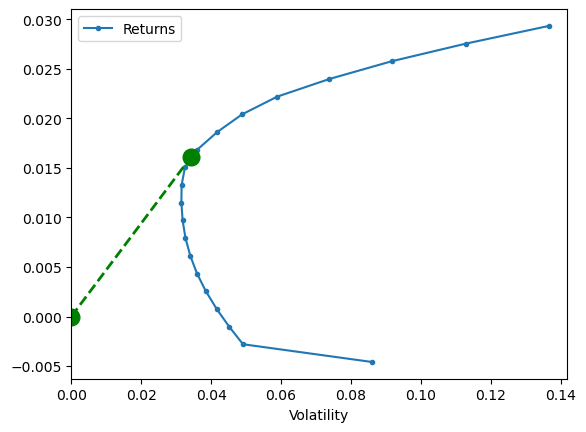

In [36]:
#Refer to documentation in erk lines 256 to 310

erk.plot_ef(20, er, cov, show_cml = True)

<Axes: xlabel='Volatility'>

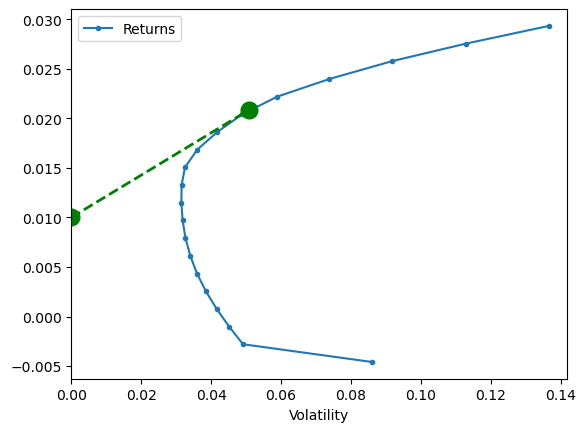

In [37]:
#If risk-free rate is not 0, but 0.1:

erk.plot_ef(20, er, cov, show_cml = True, riskfree_rate= 0.01)

## Video: Lack of robustness of Markowitz analysis

### Parameter uncertainty: The error maximizing nature of Markowitz
It is difficult to estimate model parameters in portfolio optimization, especially the one for expected return. Estimation error is minor but massive change in portfolio weights.

In [38]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk_kit as erk

ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
#Assume risk free rate of 10% for a 2=asset portfolio:
l = ["Food", "Coal"]
erk.msr(0.1, er[l], cov.loc[l,l])

#Notice the optimal portfolio will allocate 25% to Food and 75% to Steel

array([0., 1.])

In [40]:
#Expected returns:
er[l]

Food    0.009248
Coal    0.029331
dtype: float64

#### A small change in expected returns (e.g. changing 0.9% to 1%) will cause a big change in weights

In [41]:
#For example:
erk.msr(0.1, np.array([0.01, 0.03]), cov.loc[l,l])

array([5.55111512e-17, 1.00000000e+00])

In [42]:
#For example:
erk.msr(0.1, np.array([0.04, 0.02]), cov.loc[l,l])

array([0., 1.])

### Equal weight (EW) portfolio 
It is the naive diversification portfolio, where you dont have to worry about the expected returns.
To do this, we modify the plot_ef function to show the equal weights conditional.

ValueError: matmul: Input operand 0 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

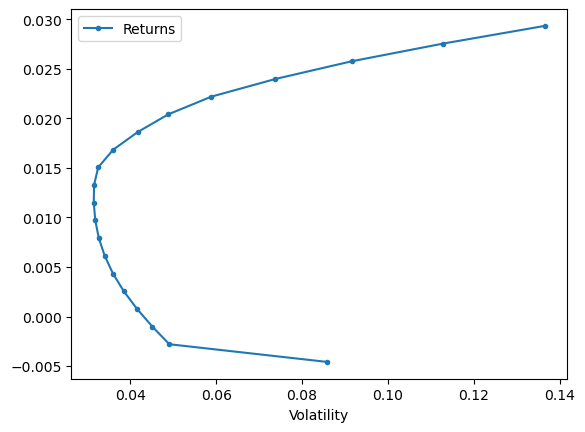

In [43]:
#Notice the EW portfolio is inside the efficient frontier, but took you almost no work to get this result:

erk.plot_ef(20, er, cov, show_cml = True, riskfree_rate= 0.01, show_ew = True)

### Global minimum variance (GMV) portfolio
The *GMV* is the portfolio that is least sensitive to errors in parameter estimates. Since it requires no expected return estimates, it is only sensitive to errors in risk parameter estimates. The asset weights of the maximum Sharpe ratio portfolio vary a lot if the expected returns of the assets change. 

But if we move along the Efficient Frontier, which all represents 1 portfolio respectively on the frontier, we will reach the nose of the curve which is also known as the GMV portfolio.


This point is not going to depend on the risk-free rate, nor expected returns, but just on volatility (as you minimize the covariance matrix - minimize the x-axis of volatility).

In [ ]:
erk.plot_ef(20, er, cov, show_cml = True, riskfree_rate= 0.01, show_ew = True, show_gmv= True)

### Summary: GMV does not depend on any estimate of expected return (er). 
All we have to do is give the GMV an expected return vector.
Although not as easy as EW, it is still easy as just need an estimate of covariance matrix.

It is hard to get to the CML point unless if you have got good expected returns, because if you tweak expected return just a little bit and the weights assign wobbles like crazy.

Alternatively for the Equally Weight Portfolio (Naive Portfolio), there is also no dependence on any estimate of expected return (er).

This is the unique aspect of GMV and EW portfolios.